In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import sys
sys.path.append('../')
from comparisons.buy_and_hold import Strategy_Comparison
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
class MeanReversion(Strategy_Comparison):

    def basic_mean_reversion(self, period, scope = 30, graph = True, analysis = True):
        period = self.default_period(period)
        segment = self.data.loc[period[0] : period[1]]

        
        '''
            The Strategies Logic
        '''

        
        investment = period[2]
        strat_investment = [ investment ]
        position = False
        time_in_market = 0

        # Loop over every data point once there is enough data to analyse previous data
        for i in range(scope, len(segment)):
            if position:
                time_in_market += 1
                perc_change = segment.iloc[i] / segment.iloc[i - 1]
                investment *= perc_change.iloc[0] # Increase investment if we are in the market
                strat_investment.append(investment) 
                # If we go above 2std above the mean, sell
                if segment.iloc[i].iloc[0] > segment.iloc[i - scope : i].mean().iloc[0] + 2 * np.sqrt(segment.iloc[i - scope : i].var().iloc[0]):
                    position = False
            else:
                strat_investment.append(0) # If we're not in the market, append 0 to investment amount
                
            if not position and segment.iloc[i].iloc[0] < segment.iloc[i - scope : i].mean().iloc[0] - 2 * np.sqrt(segment.iloc[i - scope : i].var().iloc[0]):
                position = True # if we are not in the market and the price is below 2std below the mean -> buy



        results = {
            'strat_returns' : investment,
            'strat_array_returns' : strat_investment,
            'time_in_market' : time_in_market,
        }

        return self.strategy_template(results, period = period, scope = scope, graph = graph, analysis = analysis)

            

msft = MeanReversion('MSFT')
aapl = MeanReversion('AAPL')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
period = ['2007-01-01', '2020-01-01', 100]

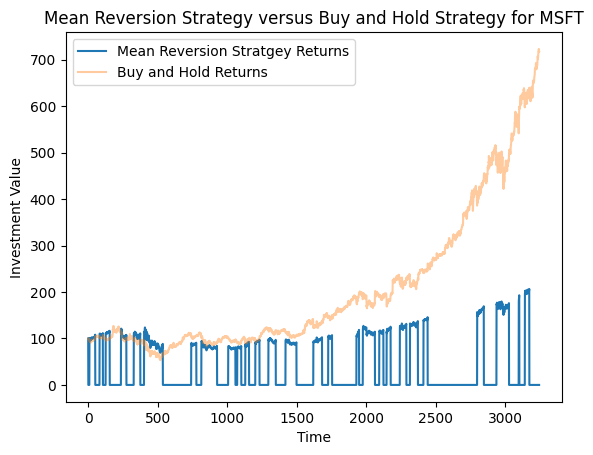

Initial Investment: 100 
Buy and Hold Returns: 717.5   percentage_increase:  617.5 % 
Strategy Returns: 206.59       percentage_increase:  106.59 %  Risk-Adjusted Returns: 265.82 %


[717.5, 617.5, 206.59, 106.59, 265.82]

In [7]:
msft.basic_mean_reversion(period)

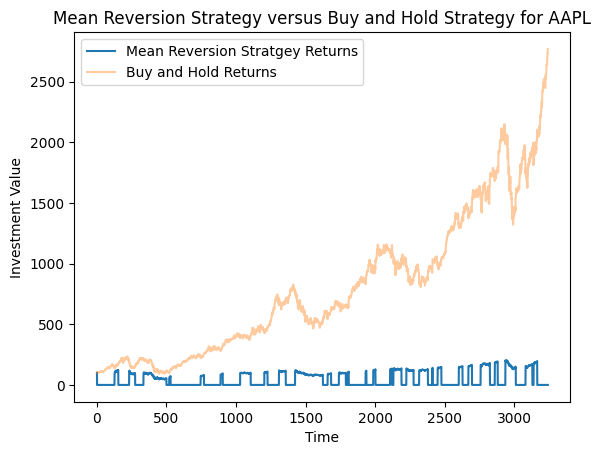

Initial Investment: 100 
Buy and Hold Returns: 2769.55   percentage_increase:  2669.55 % 
Strategy Returns: 196.94       percentage_increase:  96.94 %  Risk-Adjusted Returns: 252.24 %


[2769.55, 2669.55, 196.94, 96.94, 252.24]

In [8]:
aapl.basic_mean_reversion(period)

This is clearly a terrible investment strategy and should be tweaked to account for stocks natural inclination to go up